In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('max_columns', 100)
%matplotlib inline

In [4]:
df_train_raw = pd.read_csv('../input/train.csv')
df_test_raw = pd.read_csv('../input/test.csv')
df_train = df_train_raw.copy()
df_test = df_test_raw.copy()
train_len = len(df_train)

In [5]:
df_train.head(10)

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,1,39,blue-collar,married,secondary,no,1756,yes,no,cellular,3,apr,939,1,-1,0,unknown,1
1,2,51,entrepreneur,married,primary,no,1443,no,no,cellular,18,feb,172,10,-1,0,unknown,1
2,3,36,management,single,tertiary,no,436,no,no,cellular,13,apr,567,1,595,2,failure,1
3,4,63,retired,married,secondary,no,474,no,no,cellular,25,jan,423,1,-1,0,unknown,1
4,5,31,management,single,tertiary,no,354,no,no,cellular,30,apr,502,1,9,2,success,1
5,6,29,blue-collar,single,secondary,no,260,yes,no,unknown,2,jun,707,14,-1,0,unknown,1
6,7,37,services,married,secondary,no,52,yes,no,cellular,6,sep,908,1,185,9,success,1
7,8,32,technician,single,secondary,no,230,yes,no,cellular,18,may,442,1,266,8,failure,1
8,9,31,admin.,single,secondary,no,0,yes,no,cellular,7,may,895,2,295,2,failure,1
9,10,32,self-employed,single,tertiary,no,1815,no,no,telephone,10,aug,235,1,102,2,failure,1


In [6]:
df_test.head(10)

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,1,30,management,single,tertiary,no,1028,no,no,cellular,4,feb,1294,2,-1,0,unknown
1,2,39,self-employed,single,tertiary,no,426,no,no,unknown,18,jun,1029,1,-1,0,unknown
2,3,38,technician,single,tertiary,no,-572,yes,yes,unknown,5,jun,26,24,-1,0,unknown
3,4,34,technician,single,secondary,no,-476,yes,no,unknown,27,may,92,4,-1,0,unknown
4,5,37,entrepreneur,married,primary,no,62,no,no,cellular,31,jul,404,2,-1,0,unknown
5,6,43,services,married,primary,no,574,yes,no,cellular,8,may,140,1,-1,0,unknown
6,7,54,technician,married,secondary,no,324,yes,no,telephone,13,may,51,1,-1,0,unknown
7,8,41,blue-collar,married,secondary,no,121,yes,no,cellular,13,may,16,6,176,5,other
8,9,52,housemaid,married,primary,no,1466,no,yes,cellular,20,nov,150,1,-1,0,unknown
9,10,32,management,married,secondary,no,6217,yes,yes,cellular,18,nov,486,2,181,2,failure


In [7]:
df_train.describe().astype(int)

,id,age,balance,day,duration,campaign,pdays,previous,y
count,27128,27128,27128,27128,27128,27128,27128,27128,27128
mean,13564,40,1355,15,260,2,40,0,0
std,7831,10,3003,8,260,3,100,2,0
min,1,18,-6847,1,0,1,-1,0,0
25%,6782,33,72,8,104,1,-1,0,0
50%,13564,39,449,16,182,2,-1,0,0
75%,20346,48,1428,21,323,3,-1,0,0
max,27128,95,102127,31,4918,63,871,275,1


In [8]:
df_test.describe().astype(int)

,id,age,balance,day,duration,campaign,pdays,previous
count,18083,18083,18083,18083,18083,18083,18083,18083
mean,9042,40,1371,15,254,2,39,0
std,5220,10,3105,8,253,3,99,1
min,1,18,-8019,1,0,1,-1,0
25%,4521,33,72,8,102,1,-1,0
50%,9042,39,447,16,178,2,-1,0
75%,13562,48,1427,21,314,3,-1,0
max,18083,95,98417,31,3881,50,854,58


In [9]:
df_train.isnull().sum()

id           0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [10]:
df_test.isnull().sum()

id           0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
dtype: int64

欠損値なし

### プロット用関数

In [32]:
def plot_dist_num(data, col_name):
    plot_data = data[data[col_name].notnull()].copy()
    plt.figure(figsize=(15,2))
    plt.hist(plot_data[col_name], bins=20)
    plt.title(col_name)
    plt.show()

In [34]:
def plot_dist_obj(data, col_name):
    plot_data = data[data[col_name].notnull()].copy()
    plt.figure(figsize=(15,2))
    #data[col_name].value_counts().plot(kind='bar')
    sns.countplot(plot_data[col_name])
    plt.title(col_name)
    plt.show()

In [36]:
def plot_dist(data):
    num_cols = data.select_dtypes(include='number').columns
    obj_cols = data.select_dtypes(exclude='number').columns
    
    for col_name in num_cols:
        plot_dist_num(data, col_name)
    
    for col_name in obj_cols:
        plot_dist_obj(data, col_name)

In [37]:
def plot_vs_num(data, col_name, y_name):
    plot_data = data[data[col_name].notnull()].copy()
    plt.figure(figsize=(15,2))
    col_bin = pd.cut(plot_data[col_name], bins=10)
    sns.barplot(x=col_bin, y=plot_data[y_name])
    plt.ylabel(y_name)
    plt.title(col_name + '_bin')
    plt.show()

In [38]:
def plot_vs_obj(data, col_name, y_name):
    plot_data = data[data[col_name].notnull()].copy()
    plt.figure(figsize=(15,2))
    sns.barplot(data = plot_data, y=y_name, x=col_name)
    #plt.xlabel(col_name)
    plt.ylabel(y_name)
    plt.title(col_name)
    plt.show()

In [16]:
def plot_vs(data, y_name):
    num_cols = data.select_dtypes(include='number').columns
    obj_cols = data.select_dtypes(exclude='number').columns
    
    for col_name in num_cols:
        plot_vs_num(data, col_name, y_name)
    
    for col_name in obj_cols:
        plot_vs_obj(data, col_name, y_name)

In [17]:
def plot_box(data, col_name):
    plt.figure(figsize=(15,2))
    sns.boxplot(data = data, x='y', y=col_name)
    plt.ylabel(col_name)
    plt.xlabel('y')
    plt.title(col_name)

In [18]:
def plot_violin(data, col_name):
    plt.figure(figsize=(15,2))
    sns.violinplot(data = data, x='y', y=col_name)
    plt.ylabel(col_name)
    plt.xlabel('y')
    plt.title(col_name)

In [19]:
train_num_cols = df_train.select_dtypes(include='number').columns
train_obj_cols = df_train.select_dtypes(exclude='number').columns

## まとめてプロット

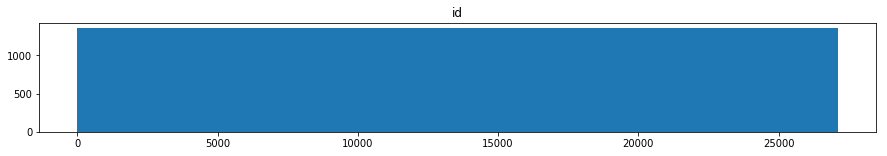

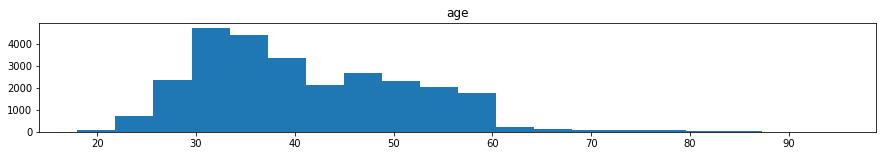

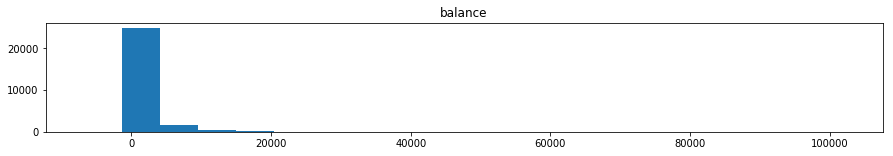

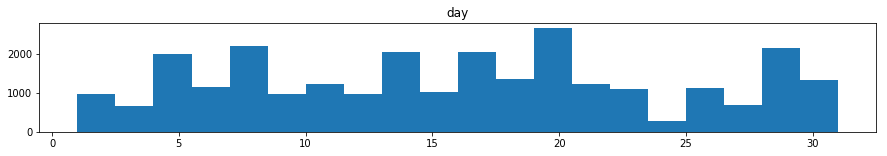

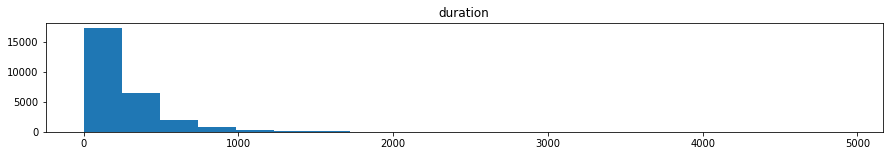

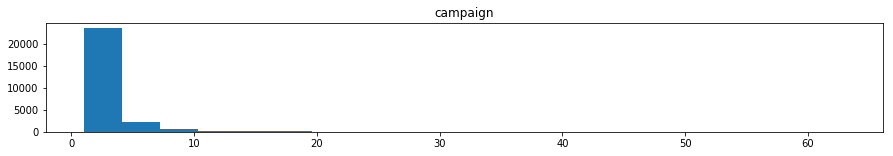

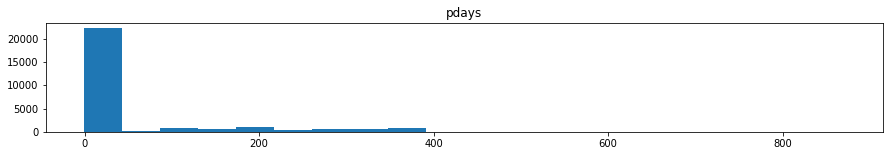

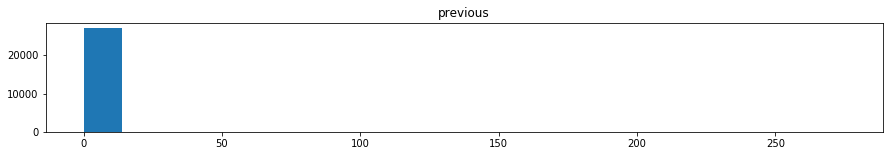

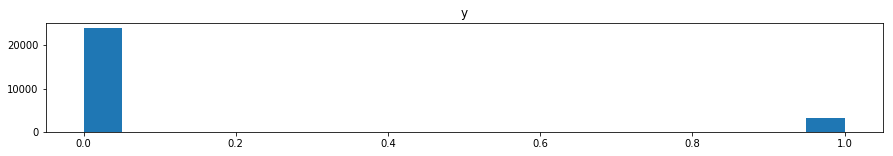

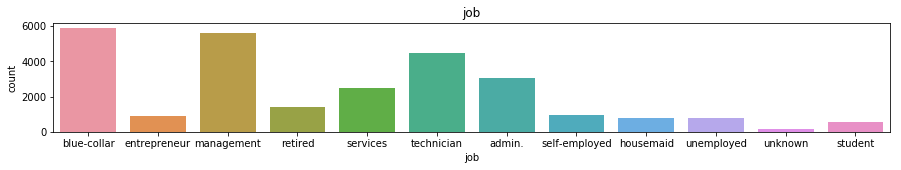

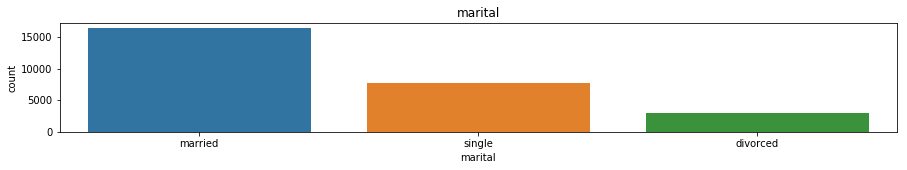

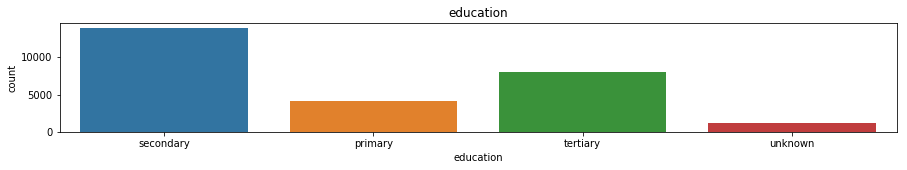

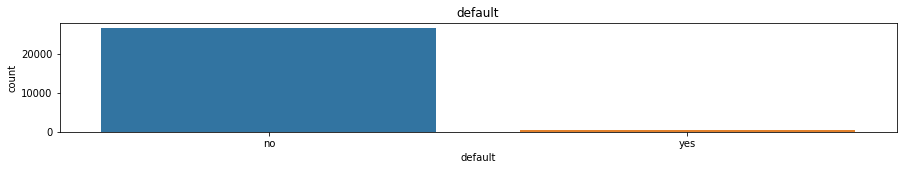

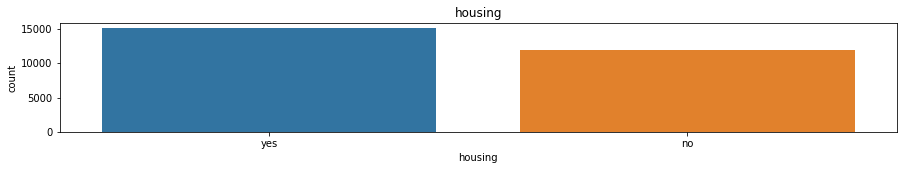

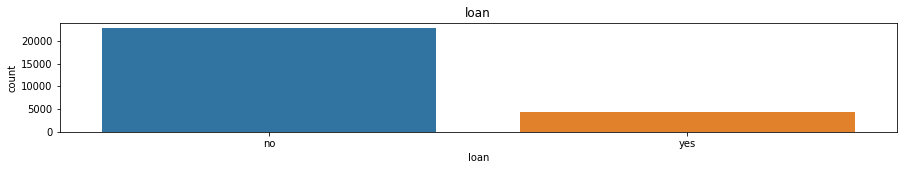

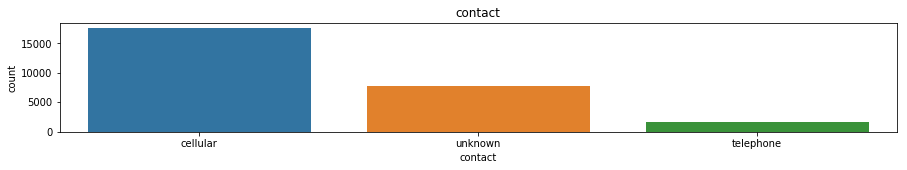

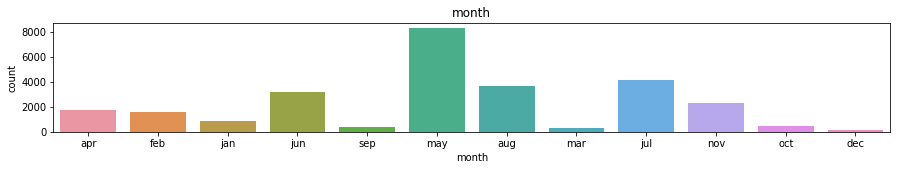

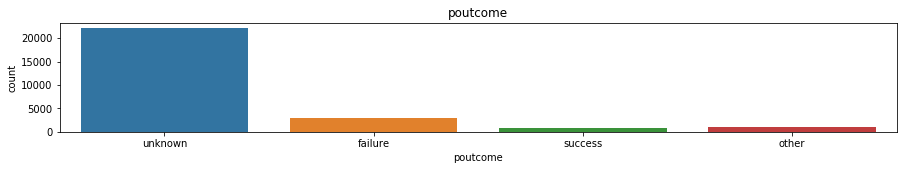

In [20]:
plot_dist(df_train)

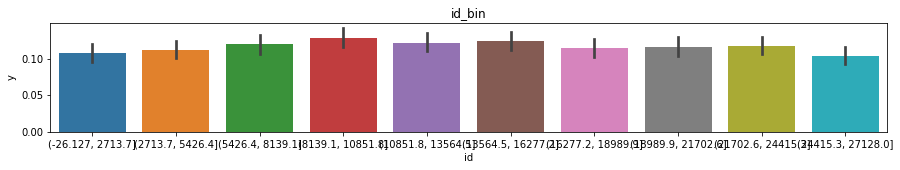

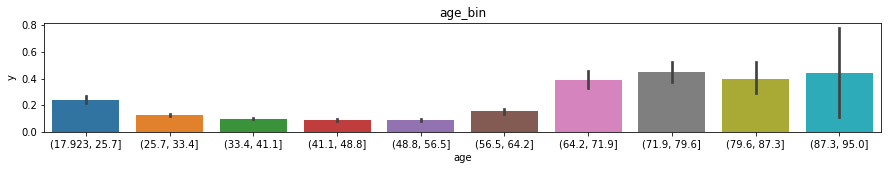

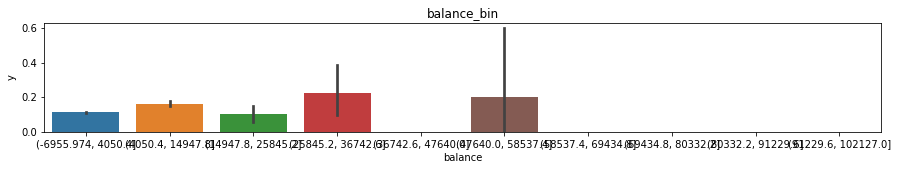

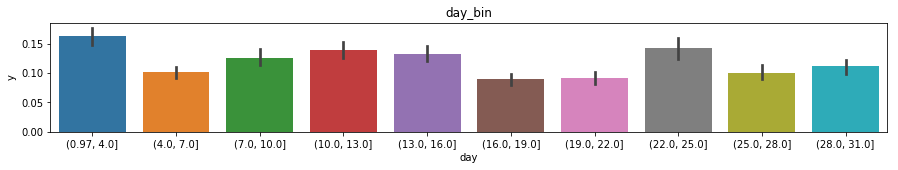

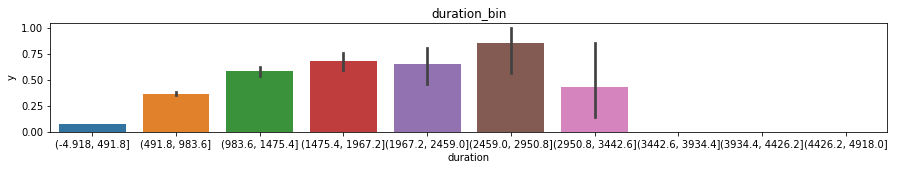

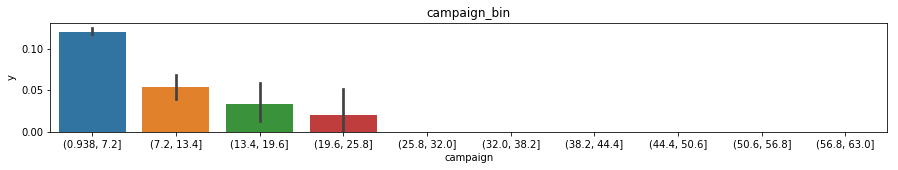

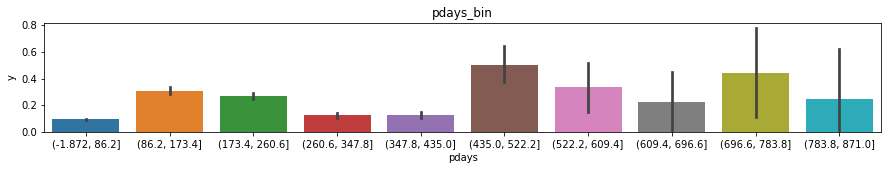

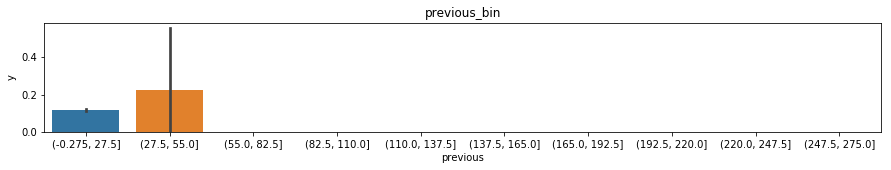

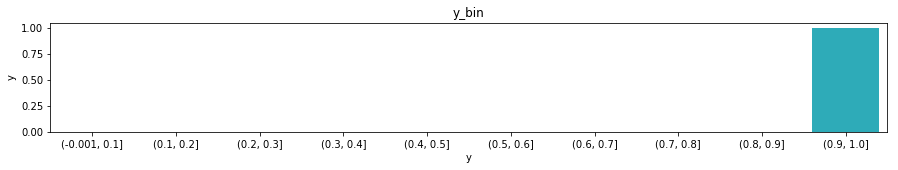

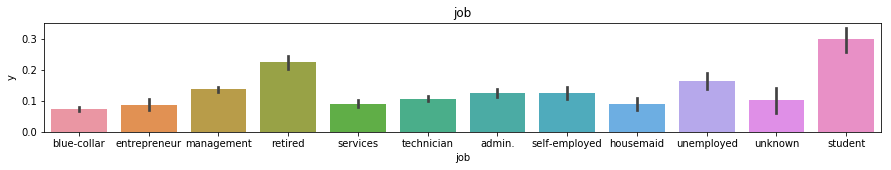

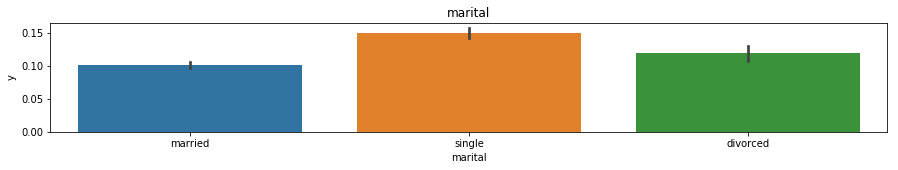

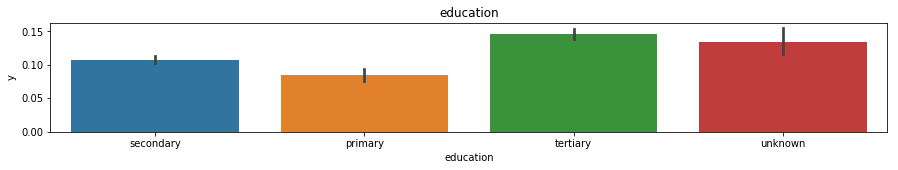

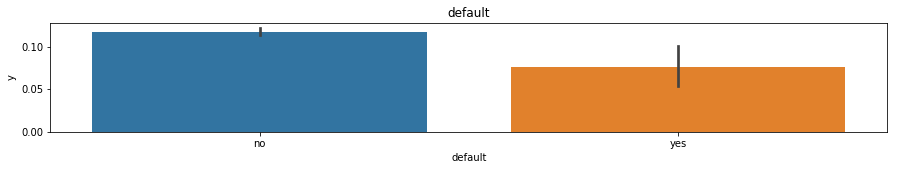

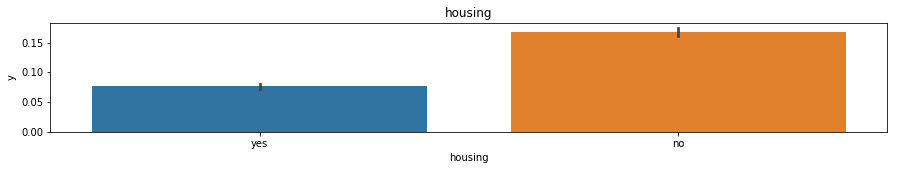

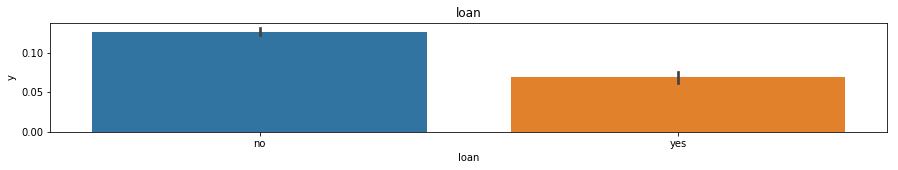

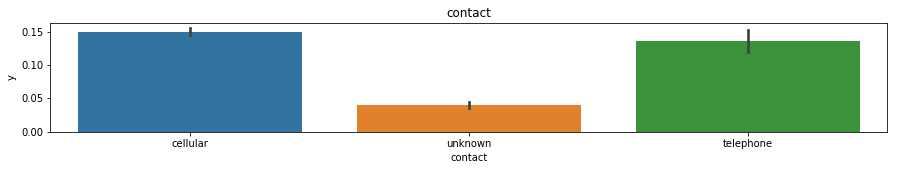

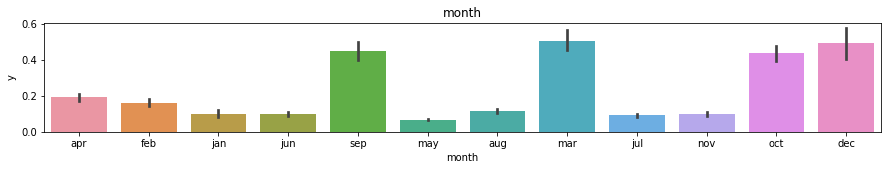

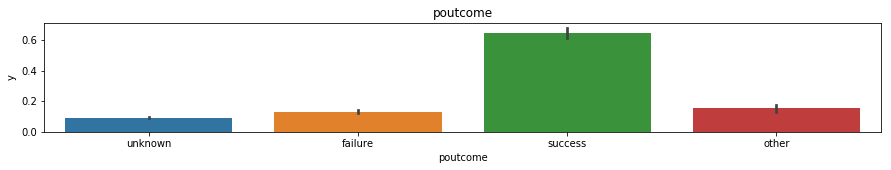

In [21]:
plot_vs(df_train, 'y')

#### y vs. 連続データ (violinplot)

#### y vs. 連続データ (boxplot)

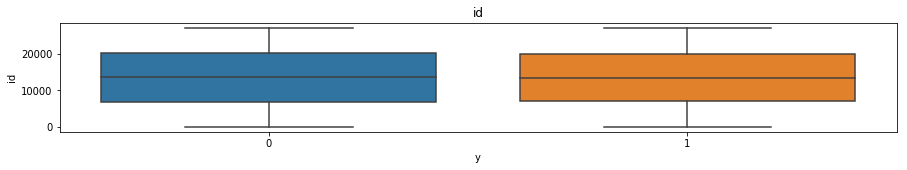

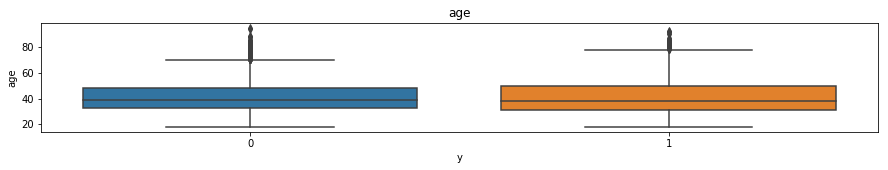

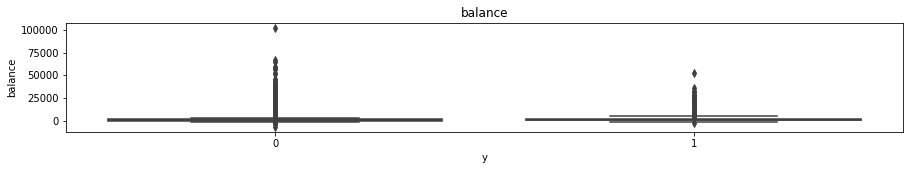

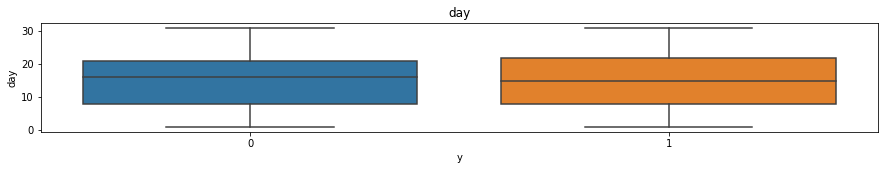

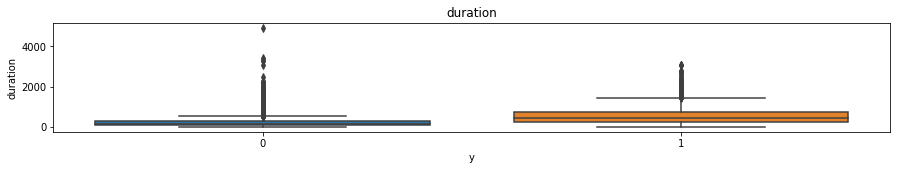

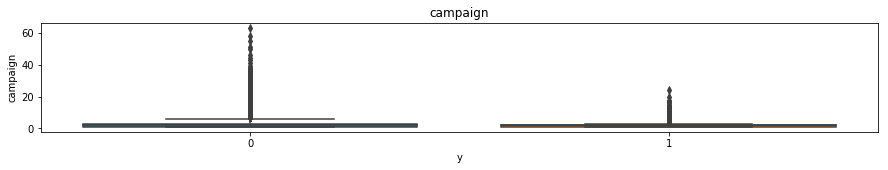

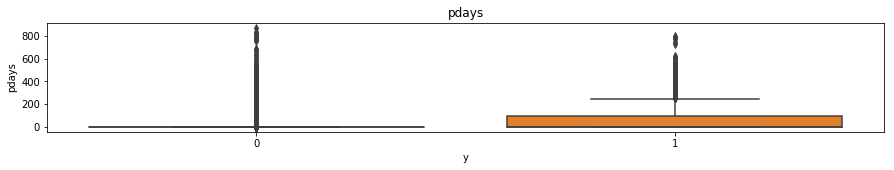

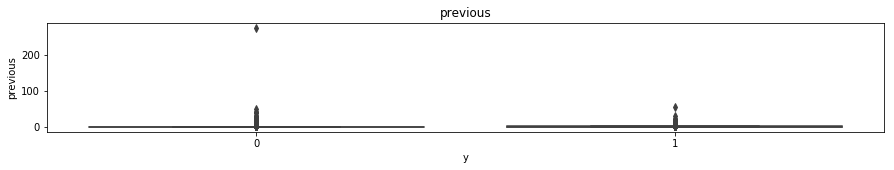

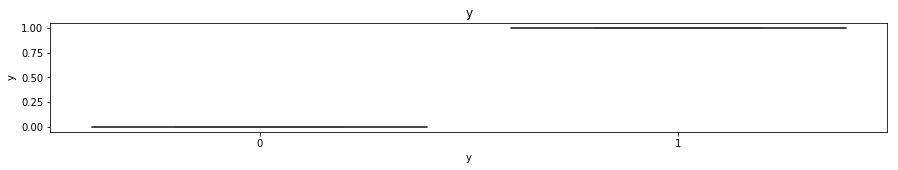

In [23]:
for col_name in train_num_cols:
    plot_box(df_train, col_name)

## 外れ値削除後

In [49]:
df_new = pd.read_csv('./trian_without_outliers.csv')

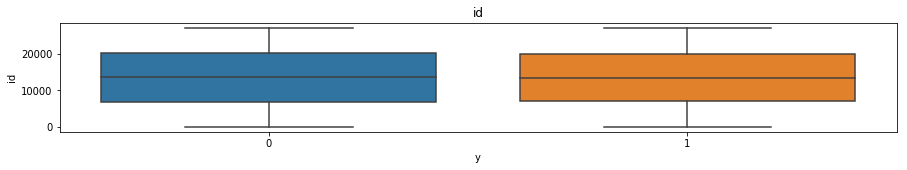

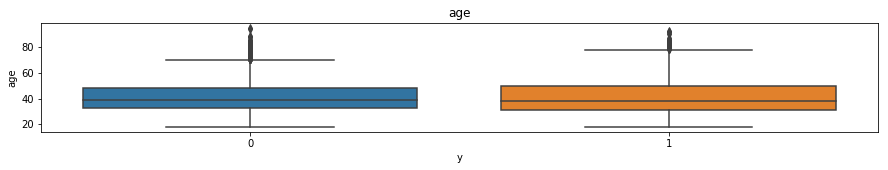

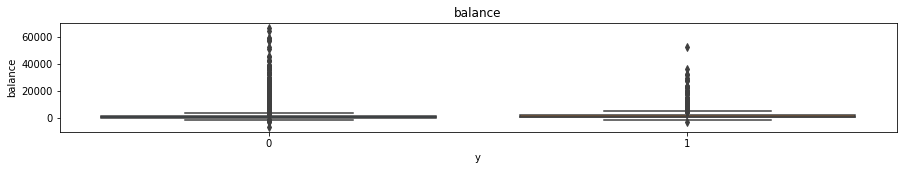

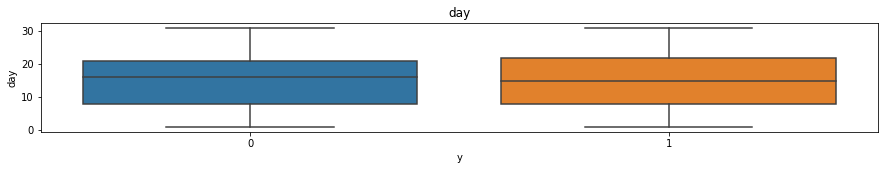

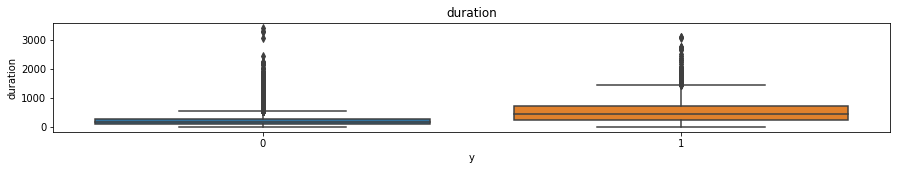

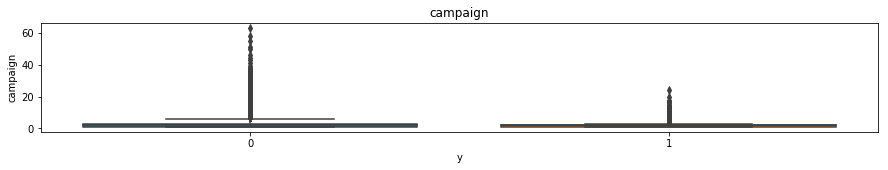

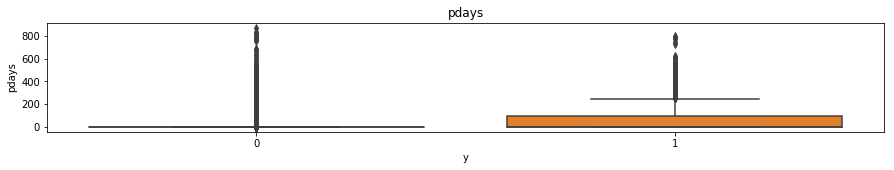

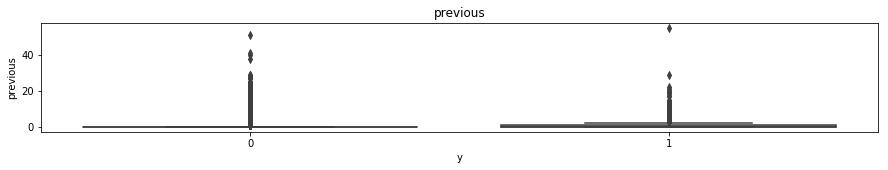

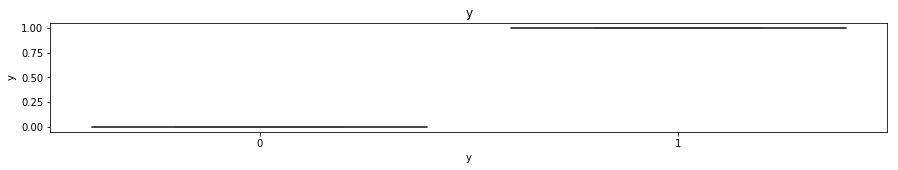

In [50]:
for col_name in train_num_cols:
    plot_box(df_new, col_name)

In [57]:
df_new[df_new.duration==0]

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
12032,12035,53,management,married,primary,no,351,yes,no,unknown,27,may,0,4,-1,0,unknown,0
13449,13452,31,entrepreneur,married,secondary,no,162,yes,yes,cellular,11,may,0,2,-1,0,unknown,0


In [64]:
df_new = pd.read_csv('./df_new_1.csv')

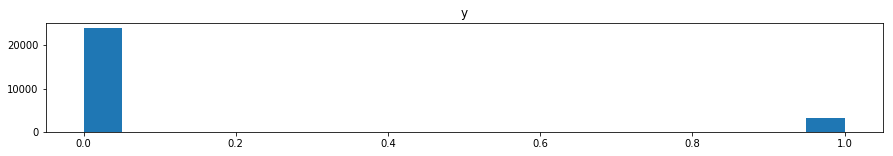

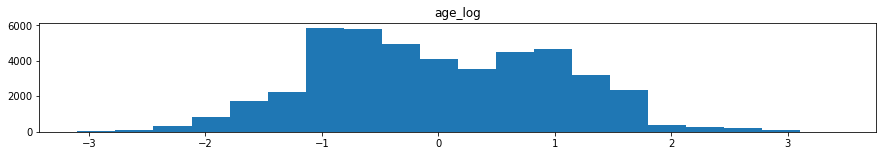

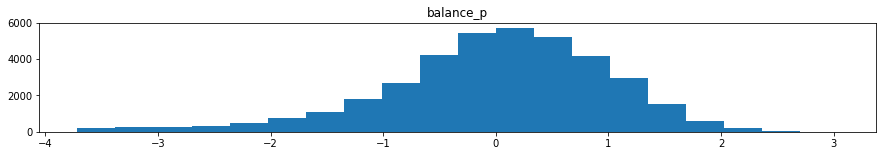

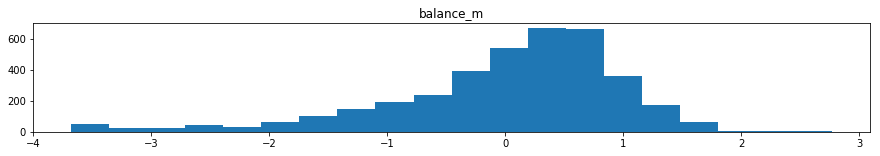

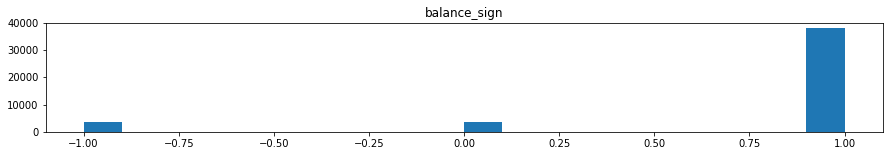

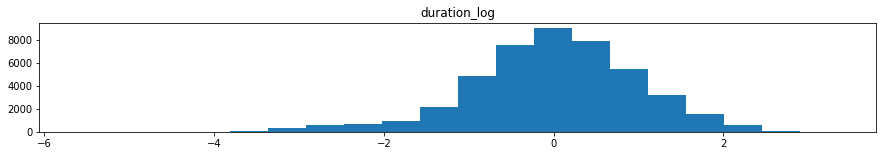

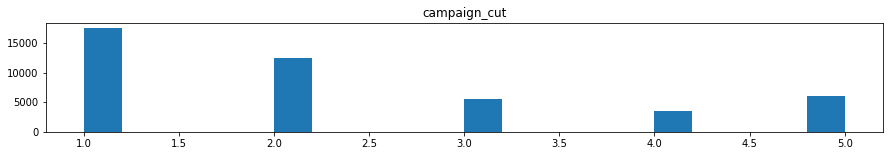

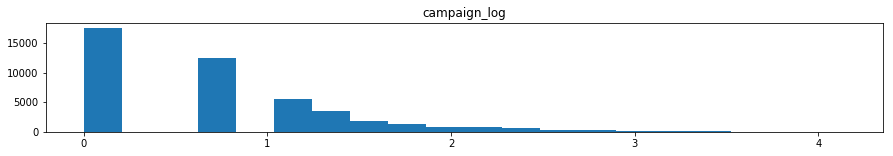

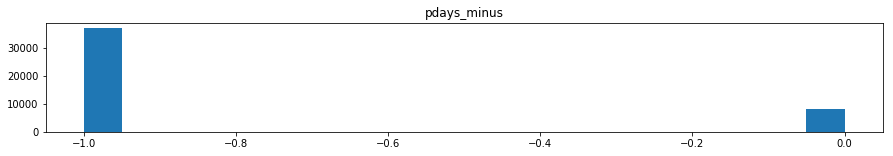

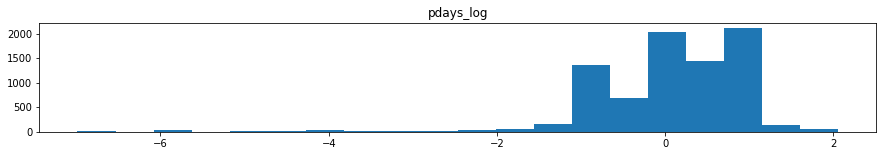

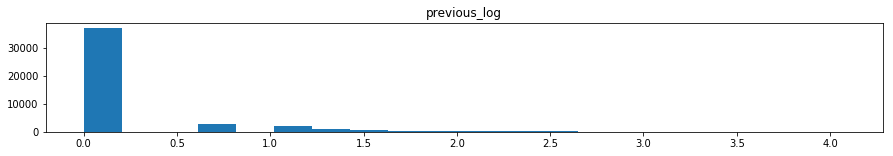

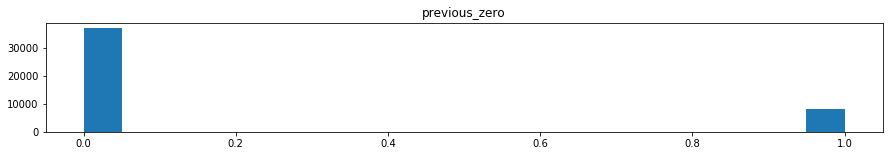

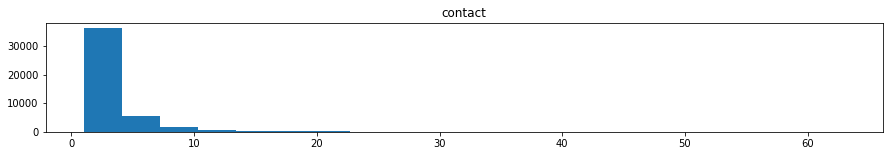

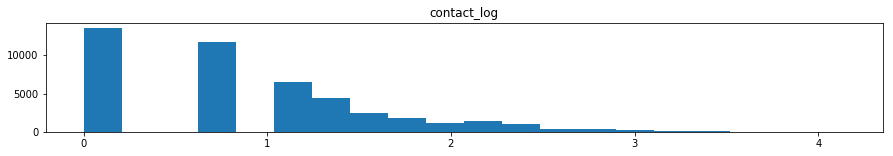

In [65]:
plot_dist(df_new)

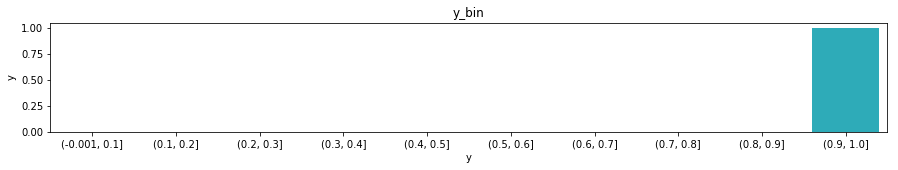

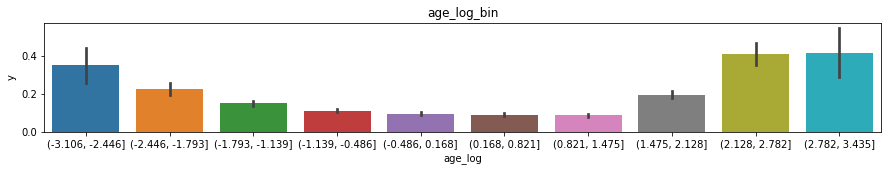

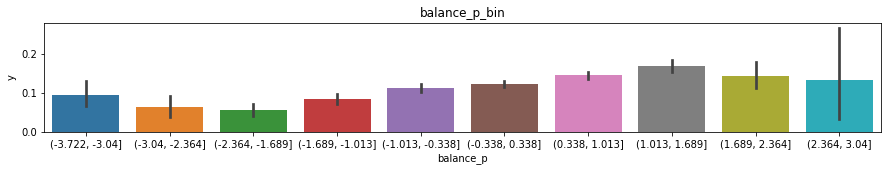

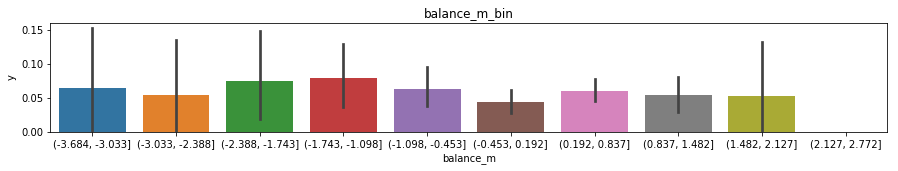

In [ ]:
plot_vs(df_new, 'y')